In [1]:
import pandas as pd
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import host,user,password,get_db_url
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Overview

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the Puestions are intentionally phrased in a vague way. It is your job to reword these as more precise Puestions that could be tested.

## Q1-Has the network latency gone up since we switched internet service providers?

$H_{0}$ - Network latency (ping) has not increased since changing ISPs

$H_{a}$ - Ping has increased since changing 
ISPs

$\mu_{Provider A} \le \mu_{Provider B}$

$H_{0}$| $H_{0}$ is True | $H_{0}$ is false
---|---|---
Accept $H_{0}$ | Latency went up and we said it did | Type I: Latency didn't go up and we said it did
Reject $H_{0}$ | Type II: Latency went up when we said it didn't| Latency did not increase and we said it didn't
 


## Q2 - Is the website redesign any good?

$H_{0}: \mu_{0} \ge \mu_{1}$ - Visitors spend the same amount of time or less on the old_site vs. the new site

$H_{a}: \mu_{0} < \mu_{1}$ - Visitors spend more time on the new site than on the old site

$\mu_0 =$ page views before site redesign

$\mu_1 = $ page views after site redesign

$H_{0}$| $H_{0}$ is True | $H_{0}$ is false
---|---|---
Accept $H_{0}$ | Page views didn't increase and we say they didn't | Type I: Page views didn't increase and we say they didn't 
Reject $H_{0}$ | Type II: Page views didnt' go up and we say they did | Page views increased and we say they did

## Q4-Is our television ad driving more sales?

$H_0: \mu_1 \leq \mu_0$

$H_a: \mu_1 \gt \mu_0$

$\mu_0$ - mean sales before ad

$\mu_1$ - mean sales after ad

$H_{0}$| $H_{0}$ is True | $H_{0}$ is false
---|---|---
Accept $H_{0}$ |We say sales did not increase and they didn't | Type I: say that sales did not increase when they did
Reject $H_{0}$ |Type II: We say sales increased when they didn't | We say sales increased and they did

## Part 2 - T-Test

## Q1 -Answer with the type of test you would use (assume normal distribution):



Is there a difference in grades of students on the second floor compared to grades of all students?

Independent T-Test 
```python
scipy.stats.ttest_1samp
```

### P2 - Are adults who drink milk taller than adults who dont drink milk?

You would use an independent t-test (2 sanple)
```python
scipy.stats.ttest_ind
```

### P3 - Is the the price of gas higher in texas or in new mexico?



You would use an independent t-test (2 sanple)
```python
scipy.stats.ttest_ind
```

## P4-Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA
```python
scipy.stats.f_oneway
```

## Q2 - Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [8]:
#setup & generate samples
n_1 = 40
mu_1 = 90
std_1 = 15
n_2 = 50
mew_2 = 100
std_2 = 20
alpha = .05
gen_1 = stats.norm(90,15)
gen_2 = stats.norm(100,20)
sales_1 = gen_1.rvs(40)
sales_2 = gen_2.rvs(50)

#### Step 1: Plot distributions

(array([4., 4., 6., 2., 4., 9., 9., 2., 5., 5.]),
 array([ 58.30441041,  66.87147415,  75.4385379 ,  84.00560165,
         92.57266539, 101.13972914, 109.70679289, 118.27385663,
        126.84092038, 135.40798413, 143.97504787]),
 <BarContainer object of 10 artists>)

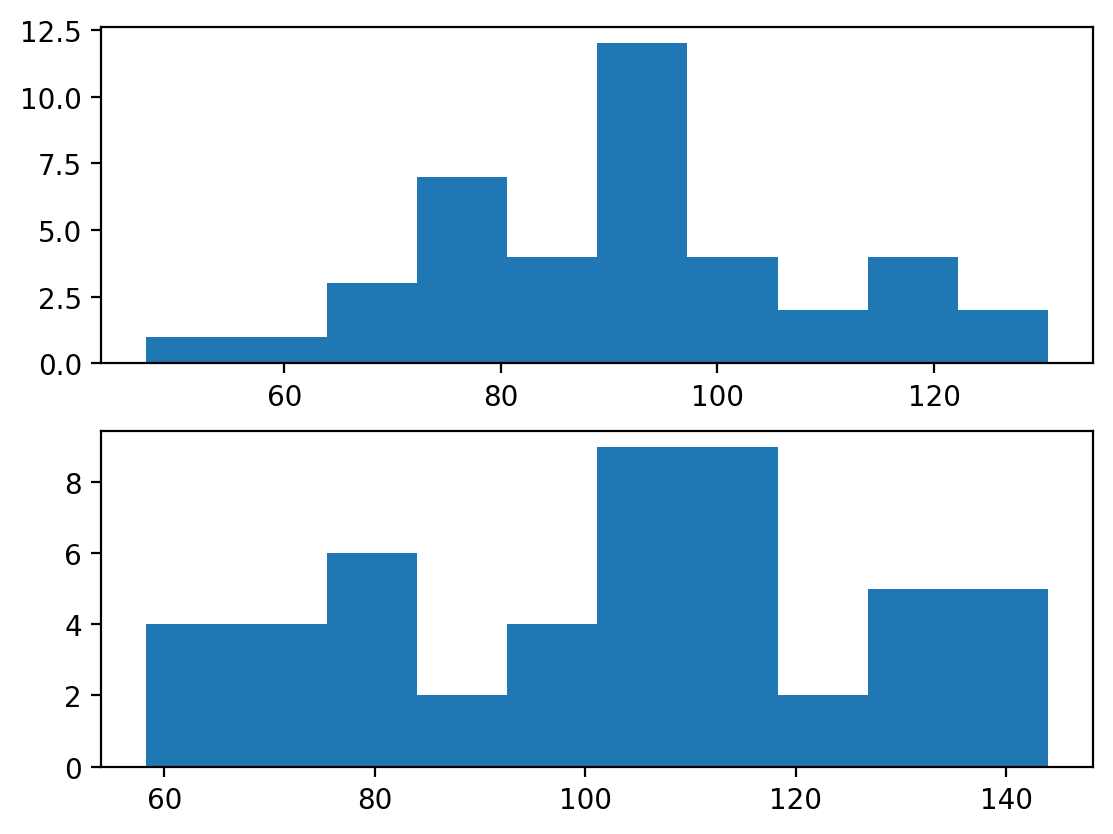

In [9]:
plt.subplot(211)
plt.hist(sales_1)
plt.subplot(212)
plt.hist(sales_2)

2. Establish Hypotheses

Hypothesis | Assumption
--- | ---
$H_{0}$ | $\mu_{1} = \mu_{2}$ |
|$H_{a}:$ | $\ \mu_{1} \neq \mu_{2}$|

3. verify assumptions
a. Independent: Yes
b. Normally Distributed? yep


In [11]:
stats.levene(sales_1,sales_2)

LeveneResult(statistic=4.825168761214469, pvalue=0.030675475247983763)

c. Equal variance: Nope!

In [12]:
t,p = stats.ttest_ind(sales_1,sales_2,equal_var=False)
t,p

(-2.8023816203543204, 0.00624477737930235)

REJECT THE NULL HYPOTHESIS

## Question 3 - Load the mpg dataset and use it to answer the following questions:

In [6]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### P1 - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

## 1. Plot distributions

<AxesSubplot:title={'center':'2008'}, xlabel='avg_fe', ylabel='Count'>

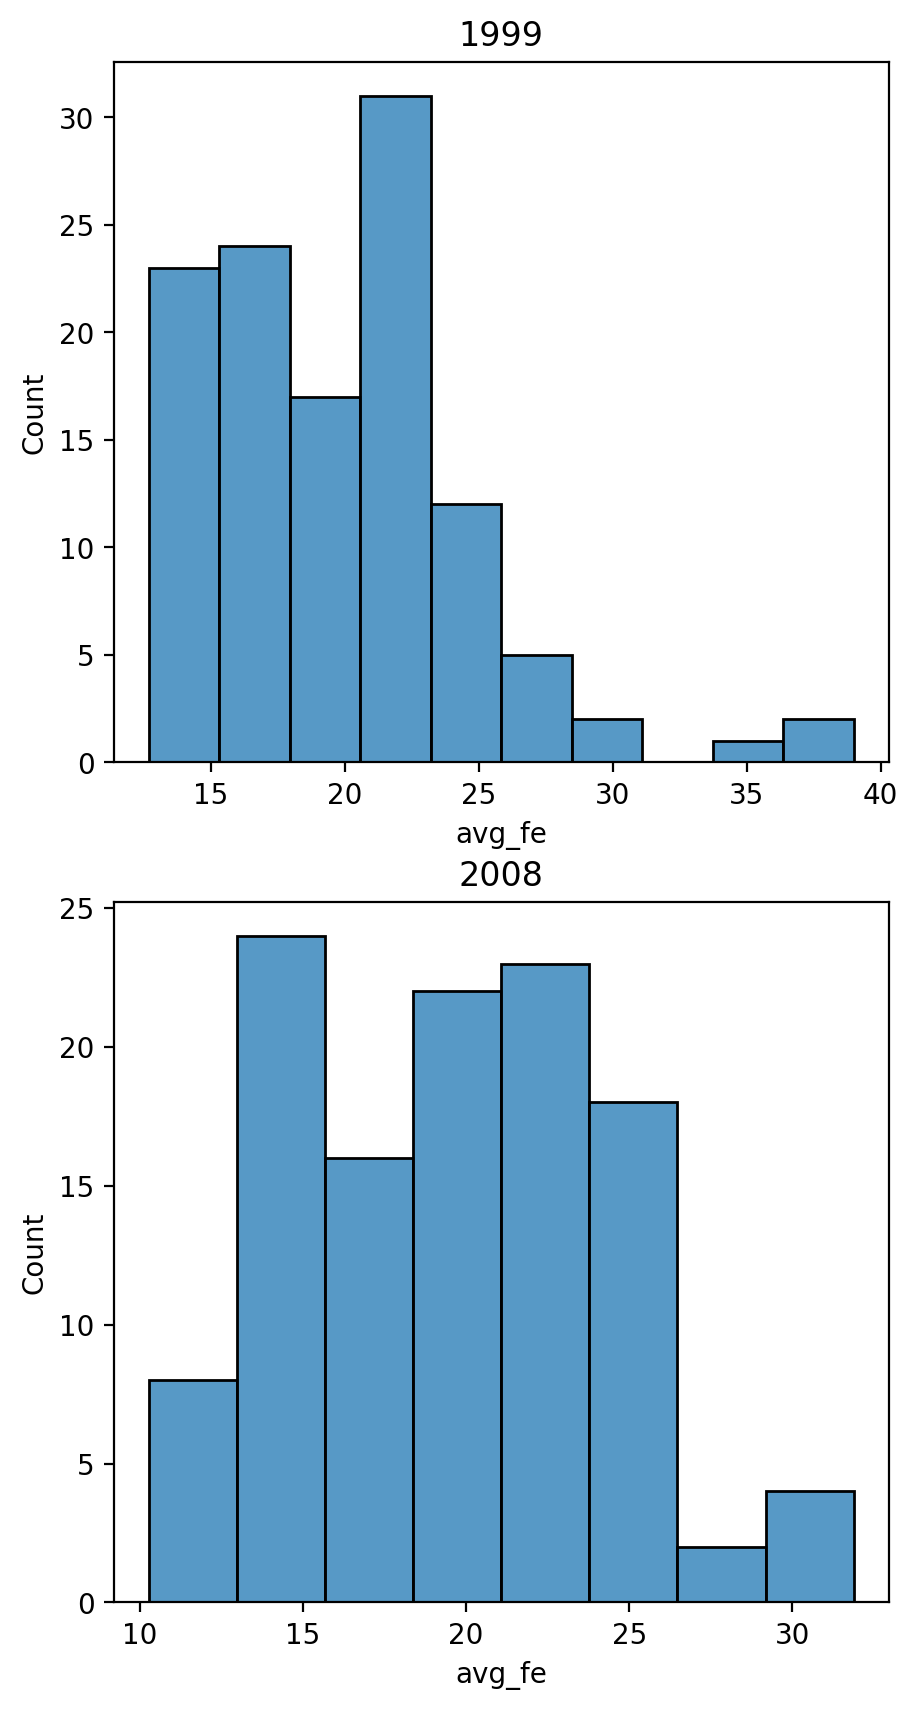

In [7]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']],axis=1)
ninety_nine = mpg[mpg.year == 1999]['avg_fe']
oh_eight = mpg[mpg.year == 2008]['avg_fe']
plt.figure(figsize=(5,10))
plt.subplot(211)
sns.histplot(data=ninety_nine)
plt.title('1999')
plt.subplot(212)
plt.title('2008')
sns.histplot(data=oh_eight)

#### Make hypothesis

  H | A  
---|---
$H_0$ | $\mu_{99} = \mu_{08}$
$H_a$ | $\mu_{99} \neq \mu_{08}$   

#### Set Alpha

In [102]:
alpha = .05

#### Verify Assumptions

Independent Samples: Yes!

Normal distribution: Good enough (large enough number of samples and average-ish distribution)

Variance:

In [103]:
stats.levene(ninety_nine,oh_eight)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

High P-value suggest variance is similar

In [104]:
t,p = stats.ttest_ind(ninety_nine,oh_eight)
if(alpha < p and t < 0):
    s = "reject null hypothesis"
else:
    s = 'failed to reject null hypothesis'
s

'failed to reject null hypothesis'

#### P2 -Are compact cars more fuel-efficient than the average car?

1 tail 1_samp ttest

#### Distribution

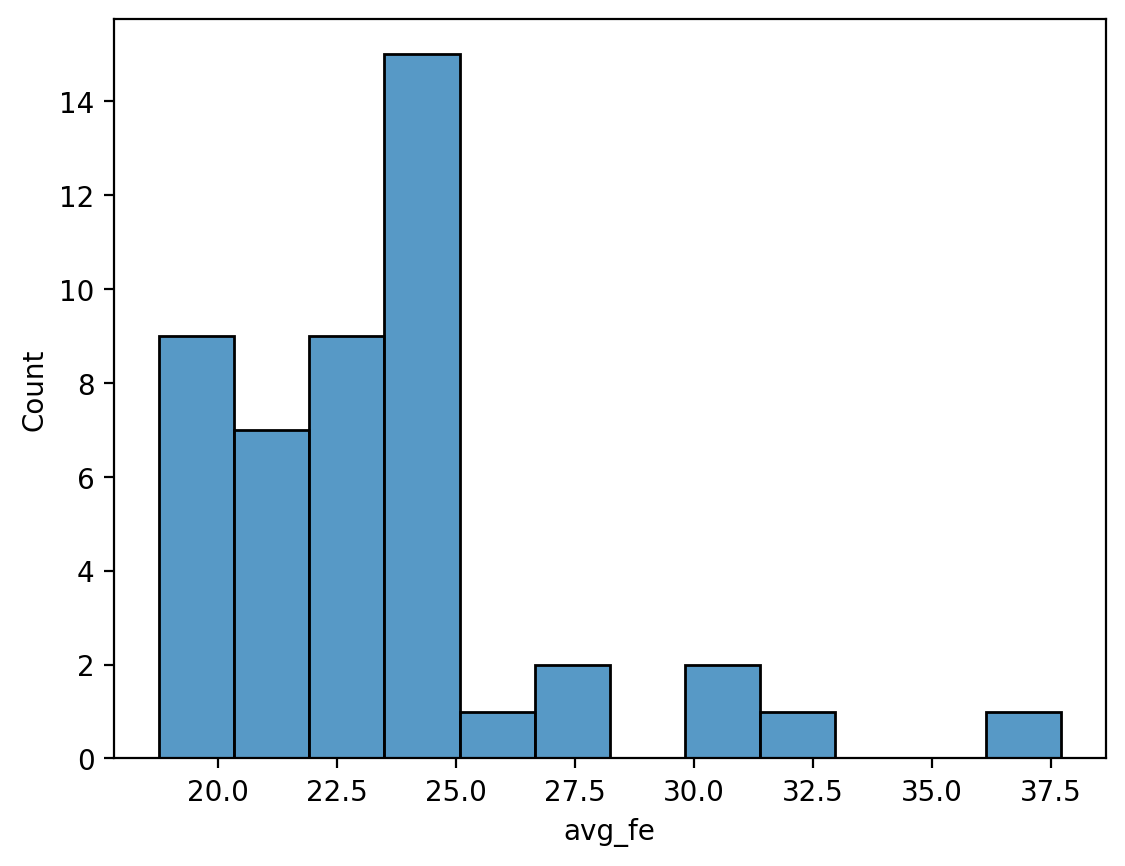

In [24]:
compacts = mpg[mpg['class'] == 'compact'].avg_fe
sns.histplot(data=compacts)
mu_all = mpg.avg_fe.mean()

### Assumptions
Normal distribution: yes!

Hypotheses
H | T
--|--
$H_0$ | $\mu_{Co} \leq \mu$
$H_a$ | $\mu_{Co} = \mu$

In [25]:
t,p = stats.ttest_1samp(compacts, mu_all)
t,p/2

(7.512360093161354, 7.808833174403864e-10)

In [107]:
f'because p/2 is {p/2:.11f} and {t} > 0, we reject the null hypothesis'

'because p/2 is 0.00000000078 and 7.512360093161354 > 0, we reject the null hypothesis'

P3 - Do manual cars get better gas mileage than automatic cars?

2 values
1 tail
Hypothesis | Text1
---|---
$H_0$| $\mu_{man} \leq \mu_{aut}$
$H_a$ | $\mu_{man} > \mu_{aut}$

<AxesSubplot:xlabel='avg_fe', ylabel='Density'>

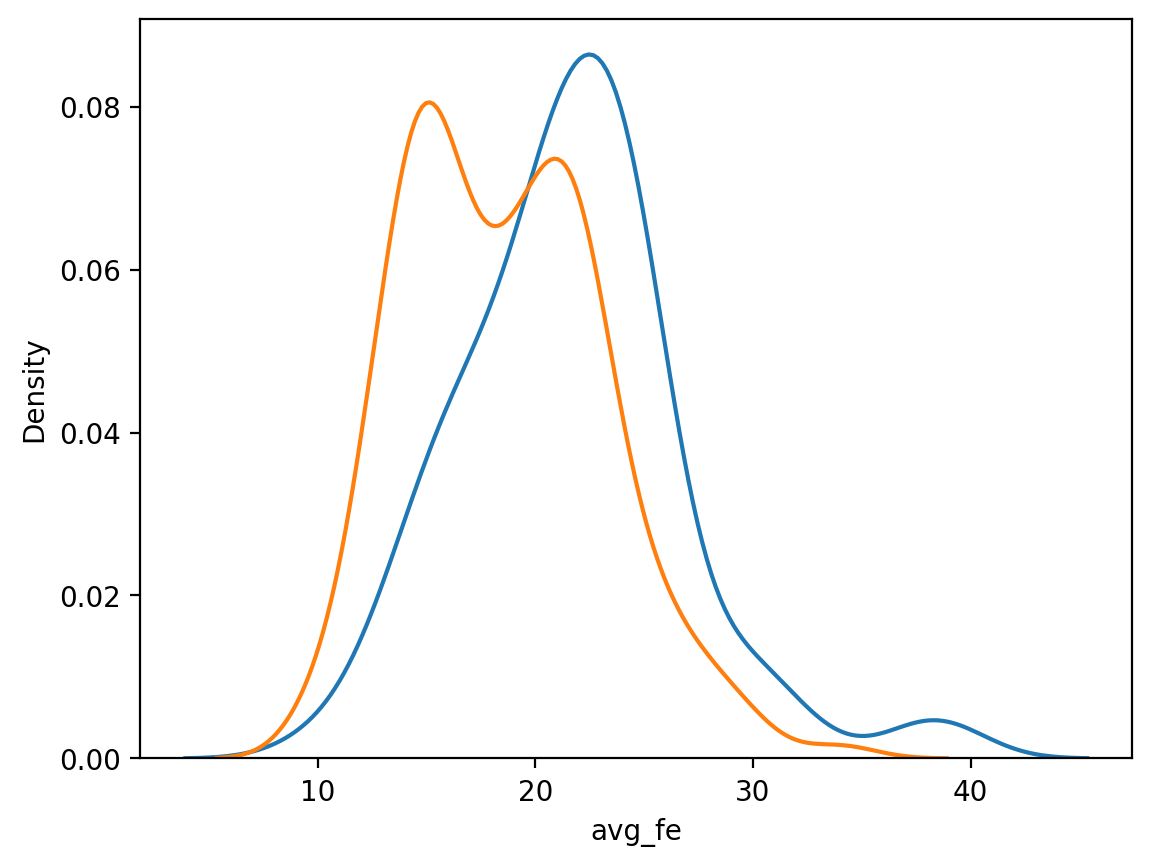

In [108]:
manuals = mpg[mpg.trans.str.startswith('m')].avg_fe
autos = mpg[mpg.trans.str.startswith('a')].avg_fe
sns.kdeplot(data=manuals)
sns.kdeplot(data=autos,legend=True)

* Normal distribution? Enough
* Independent? Sure are!
* Variance?

In [109]:
stats.levene(autos,manuals)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

Variance is good! let's do this thing!!!


In [110]:
t,p = stats.ttest_ind(autos,manuals)
if t < 0 and p/2 < alpha:
    returnstr = f'because {p/2:.11f} < {alpha} and {t} < 0, we reject the null hypothesis'
else:
    returnstr = f'because {p/2:.11f} > {alpha} and {t} > 0, we failed to  the null hypothesis'
returnstr

'because 0.00000275523 < 0.05 and -4.652577547151351 < 0, we reject the null hypothesis'

# Correlation

## Q1 -Answer with the type of stats test you would use (assume normal distribution):



### Is there a relationship between the length of your arm and the length of your foot?

Pearsonr

### Do guys and gals quit their jobs at the same rate?
multisample

### Does the length of time of the lecture correlate with a students grade?
multisample

In [126]:
#Use the telco_churn data.
db_url = get_db_url(host,user,password,'telco_churn')
query = '''
SELECT * FROM customers
JOIN internet_service_types USING(internet_service_type_id)
'''
telco_churn = pd.read_sql(query,db_url)
telco_churn.total_charges = telco_churn.total_charges.replace(' ',np.nan).astype(float)
telco_churn = telco_churn.dropna()
telco_churn.shape

(7032, 22)

### Does tenure correlate with monthly charges?


In [127]:
telco_churn.tenure
monthly_charges = telco_churn.monthly_charges
r,p = stats.pearsonr(telco_churn.tenure,monthly_charges)
r,p

(0.2468617666408935, 3.9898213232673846e-98)

### Total charges?

(0.825880460933202, 0.0)

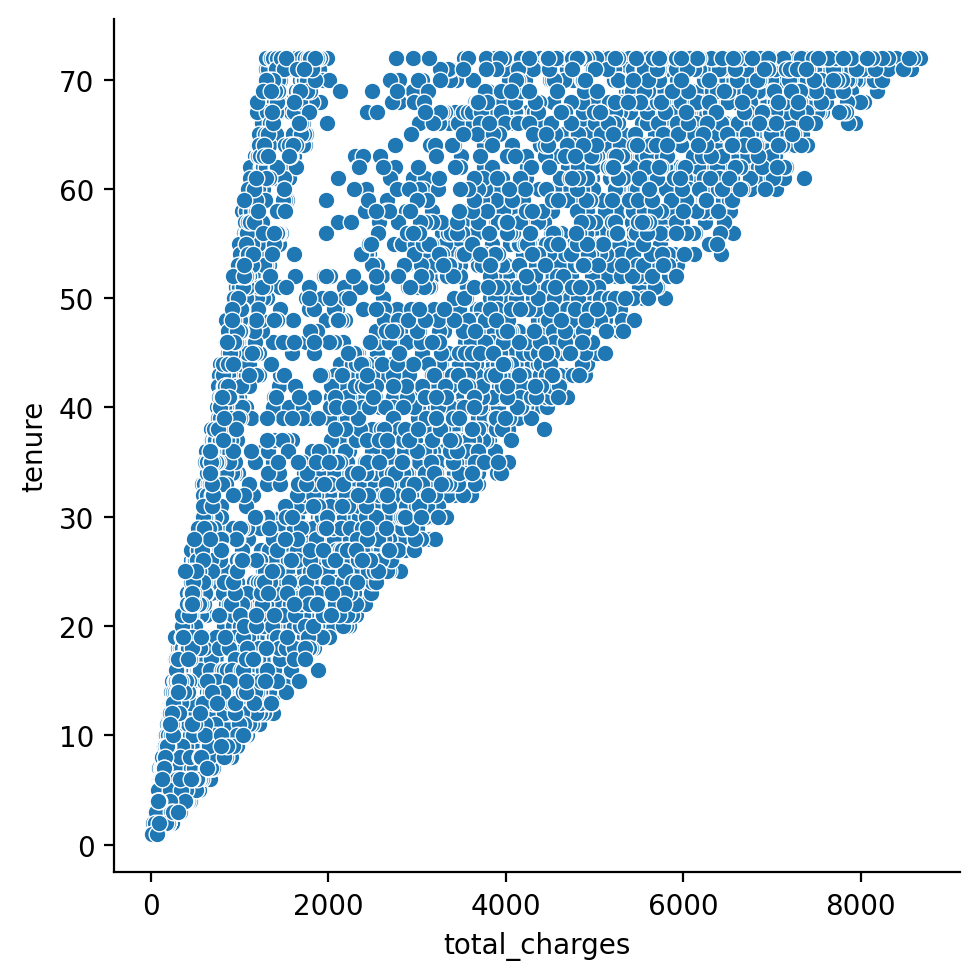

In [128]:
r,p = stats.pearsonr(telco_churn.tenure,telco_churn.total_charges)
sns.relplot(x=telco_churn.total_charges,y=telco_churn.tenure)
r,p


In [131]:
telco_churn.groupby(['internet_service_type', 'phone_service']).apply(lambda p:\
    pd.Series(stats.pearsonr(telco_churn.tenure,monthly_charges),index=['r','p']))

r             p
internet_service_type phone_service                        
DSL                   No             0.246862  3.989821e-98
                      Yes            0.246862  3.989821e-98
Fiber optic           Yes            0.246862  3.989821e-98
None                  Yes            0.246862  3.989821e-98

### Use the employees database.
#### Is there a relationship between how long an employee has been with the company and their salary?

In [30]:
db_url = get_db_url('employees')
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''
employees = pd.read_sql(query,db_url)
employees.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


#### Set null hypothesis
H | A
--|--
$H_{0}$ | There is no linear relationship between tenure and salary
$H_{a}$ | There is a linear relationship between tenure and salary

In [31]:
stats.pearsonr(employees.tenure,employees.salary)

(0.3064625613186077, 0.0)

### Conclusion

#### Because P < 0 we can reject the null hypothesis.

## Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [34]:
#Perform Query
query = '''
SELECT DATEDIFF((SELECT MAX(hire_date) FROM employees),e.hire_date) AS tenure,
no_titles
FROM employees AS e
JOIN (
    SELECT emp_no, COUNT(*) AS no_titles
    FROM titles
    GROUP BY emp_no
) AS title_count USING(emp_no)

'''
employees = pd.read_sql(query,db_url)

### Set Hypothesis
H | A
---|---
$H_0$ | There is not a linear relationship between tenure and number of titles
$H_a$ | There is a lineear relationship between tenure and number of titles

In [35]:
#Run test
stats.pearsonr(employees.tenure, employees.no_titles)

(0.26659892991366185, 0.0)

Because $P \lt 0.5$ we can reject the null hypothesis

## Use the sleepstudy data. Is there a relationship between days and reaction time?

In [39]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


### Set Hypothesis
H | A
---|---
$H_0$ | There is not a linear relationship between number of days and reaction time
$H_a$ | There is a linear relationship between number of days and reaction time

In [40]:
stats.pearsonr(sleepstudy.Reaction, sleepstudy.Days)

(0.5352302262650253, 9.894096322214812e-15)

Because p < 0.05 (⍺), we can reject the null hypothesis.

# $\chi^2$

## Answer with the type of stats test you would use (assume normal distribution):
#### Do students get better test grades if they have a rubber duck on their desk?
```stats.ttest_ind```

#### Does smoking affect when or not someone has lung cancer?
`stats.chi2_contingency`
#### Is gender independent of a person’s blood type?
`stats.chi2_contingency`

#### A farming company wants to know if a new fertilizer has improved crop yield or not
`stats.ttest_ind`
#### Does the length of time of the lecture correlate with a students grade?
`stats.pearsonr`
#### Do people with dogs live in apartments more than people with cats?
`stats.chi2_contingency`


## Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

#### Set Hypotheses

$H_0$: There is not a relationship between having a Macbook and being a codeup student

$H_a$: There is a relationshiup between having a Macbook and being a codeup student

In [41]:

macbook_crosstab = {'Codeup Student':{'Uses Macbook':49,'Doesn\'t use Macbook':1},\
    'Not Codeup Student':{'Uses Macbook':20,'Doesn\'t use Macbook':30}}
observed = pd.DataFrame(macbook_crosstab)
chi2, p,degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'degrees of Freedom: {degf}')
print(f'chi^2 = {chi2}')
print(f'p     = {p}')

Observed
                     Codeup Student  Not Codeup Student
Uses Macbook                     49                  20
Doesn't use Macbook               1                  30
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---

degrees of Freedom: 1
chi^2 = 36.65264142122487
p     = 1.4116760526193828e-09


Because p < 0 we reject the null hypothesis

Choose another 2 categorical variables from the `mpg` dataset and perform a $chi^2$ 
contingency table test with them. Be sure to state your null and alternative hypotheses.

$H_0$: There is not a relationship between manufacturer and whether a car is automatic or manual

$H_a$: There is a relationship between manufacturer and whether a car is automatic or manual

In [156]:
mpg['is_automatic'] = mpg.trans.apply(lambda i: True if i.startswith('a') else False)
observed = pd.crosstab(mpg.is_automatic,mpg.manufacturer).transpose()
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'degrees of Freedom: {degf}')
print(f'chi^2 = {chi2}')
print(f'p     = {p}')

Observed
is_automatic  False  True
manufacturer             
audi              7    11
chevrolet         3    16
dodge             7    30
ford              8    17
honda             5     4
hyundai           7     7
jeep              0     8
land rover        0     4
lincoln           0     3
mercury           0     4
nissan            5     8
pontiac           0     5
subaru            7     7
toyota           14    20
volkswagen       14    13
---
Expected
[[ 5.92307692 12.07692308]
 [ 6.25213675 12.74786325]
 [12.17521368 24.82478632]
 [ 8.22649573 16.77350427]
 [ 2.96153846  6.03846154]
 [ 4.60683761  9.39316239]
 [ 2.63247863  5.36752137]
 [ 1.31623932  2.68376068]
 [ 0.98717949  2.01282051]
 [ 1.31623932  2.68376068]
 [ 4.27777778  8.72222222]
 [ 1.64529915  3.35470085]
 [ 4.60683761  9.39316239]
 [11.18803419 22.81196581]
 [ 8.88461538 18.11538462]]
---

degrees of Freedom: 14
chi^2 = 29.293684393117655
p     = 0.00953444310358795


Because P < .05, we reject the null hypothesis

## Use the data from the employees database to answer these questions:
### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: There is not a relationship between an employees gender and whether they work in sales or marketing

$H_a$: There is a relationship between an employees gender and whether they work in sales or marketing

In [42]:
query = '''SELECT * FROM employees
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no)
WHERE to_date > CURDATE()
AND dept_name IN ('Sales', 'Marketing')'''
q5_employees = pd.read_sql(query,get_db_url('employees'))


In [172]:
observed = pd.crosstab(q5_employees.dept_name, q5_employees.gender)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'degrees of Freedom: {degf}')
print(f'chi^2 = {chi2}')
print(f'p     = {p}')

Observed
gender         F      M
dept_name              
Marketing   5864   8978
Sales      14999  22702
---
Expected
[[ 5893.2426013  8948.7573987]
 [14969.7573987 22731.2426013]]
---

degrees of Freedom: 1
chi^2 = 0.3240332004060638
p     = 0.5691938610810126


Because p is not less than alpha, we failed to reject the null hypothesis

### Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: There is not a relationship between an employees gender and whether they are/were a manager

$H_a$: There is a relationship between an employees gender and whether they are/were a manager


In [50]:
query = '''
SELECT e.gender, m.dept_no
FROM employees AS e
LEFT JOIN dept_manager as m USING(emp_no)
'''
employees = pd.read_sql(query,db_url)
employees['is_manager'] = employees.dept_no.notnull()
observed = pd.crosstab(employees.gender,employees.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'degrees of Freedom: {degf}')
print(f'chi^2 = {chi2}')
print(f'p     = {p}')

Observed
is_manager   False  True
gender                  
F           120038    13
M           179962    11
---
Expected
[[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]
---

degrees of Freedom: 1
chi^2 = 1.4566857643547197
p     = 0.22745818732810363


Because p < .05, we reject the null hypothesis